# Modeling

__Split the data, make sure to drop the testflag, trainflag, and label from the training set for our features__

In [138]:
from sklearn.model_selection import train_test_split
# Assigning the features and labels to variables before splitting them
label = train['SalePrice']
features = train.drop(['SalePrice', 'testflag', 'trainflag'], axis=1)


# #scale the features
# scale = preprocessing.StandardScaler()
# scale.fit(features)
# scaled_features = scale.transform(features)
# scaled_features

# Splitting the observations into a training and a testing set for the holdout method

X_train, X_test, y_train, y_test = train_test_split(features, label,
                                                    test_size=0.30, random_state=46)


__Define a function to score our regression models__

In [139]:
def get_score(model, norm=False):
        '''
        Fits the model and returns a series containing the RMSE, MAE, and R^2
        '''
        from sklearn.metrics import mean_squared_error, mean_absolute_error
        import time

        startTime = time.time()  # Getting training time
        
        # Fits with either regular or normalized training set
        if norm == False:
            model.fit(X_train, y_train)
            totalTime = time.time() - startTime
            predictions = model.predict(X_test)
        
            r2 = model.score(X_test, y_test)
            rmse = np.sqrt(mean_squared_error(y_test, predictions))
            mae = mean_absolute_error(y_test, predictions)
        else:
            model.fit(X_train_norm, y_train)
            totalTime = time.time() - startTime
            predictions = model.predict(X_test_norm)
        
            r2 = model.score(X_test_norm, y_test)
            rmse = np.sqrt(mean_squared_error(y_test, predictions))
            mae = mean_absolute_error(y_test, predictions)
            
        score_results = pd.Series([r2, rmse, mae, totalTime], index=['R^2', 'RMSE', 'MAE', 'TrainingTime(sec)'])
        
        return score_results

__LinearRegression__

In [140]:
# Linear regression - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression
lm = LinearRegression(n_jobs=-1)
lmScore = get_score(lm)
lmScore

R^2                     0.886099816710188226
RMSE                25629.053181083691015374
MAE                 17370.792451895427802810
TrainingTime(sec)       0.027443885803222656
dtype: float64

__Decision Tree__

In [141]:
  # Decision tree - http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=None, min_samples_split=2, min_samples_leaf=1)
dtScore = get_score(dt)
dtScore

R^2                     0.695036288163313642
RMSE                41936.717423221860371996
MAE                 25385.262557077625388047
TrainingTime(sec)       0.037776470184326172
dtype: float64

__KNN__

In [142]:
# k-NN - http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=8, n_jobs=-1)
knnScore = get_score(knn)
knnScore

R^2                     0.792441927432087301
RMSE                34597.137318891618633643
MAE                 23203.841324200911913067
TrainingTime(sec)       0.020122289657592773
dtype: float64

__Yellowbrickroad is a really cool visualization package for looking at residual plotshttps://www.scikit-yb.org/en/latest/api/regressor/residuals.html__

ResidualsPlot(alpha=0.75,
       ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002DBA19F9CC0>,
       hist=True, line_color=None, model=None, test_color=None,
       train_color=None)

0.7924419274320873

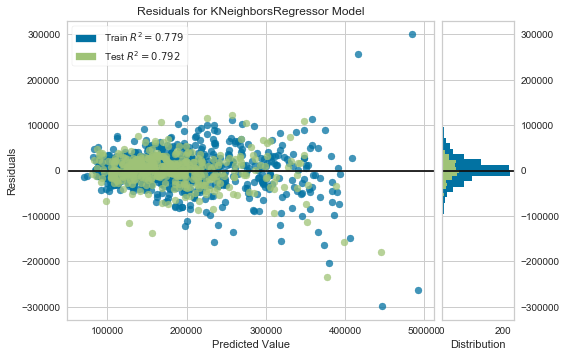

In [143]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(knn)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

__SVM__

In [146]:
# Min-max scaling for neural nets and SVMs
from sklearn import preprocessing
X_train_norm = preprocessing.normalize(X_train, norm='max', axis=0)  # Normalizing across columns
X_test_norm = preprocessing.normalize(X_test, norm='max', axis=0)  # Normalizing across columns


# Support Vector Machine - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
from sklearn.svm import SVR
svm = SVR(C=1.0, epsilon=0.1, kernel='rbf')
svmScore = get_score(svm, norm=True)
svmScore

C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



R^2                    -0.041440032291496953
RMSE                77497.462853701101266779
MAE                 54516.497179584344848990
TrainingTime(sec)       0.423693418502807617
dtype: float64

C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



ResidualsPlot(alpha=0.75,
       ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002DBA28C3518>,
       hist=True, line_color=None, model=None, test_color=None,
       train_color=None)

-0.041674871487434206

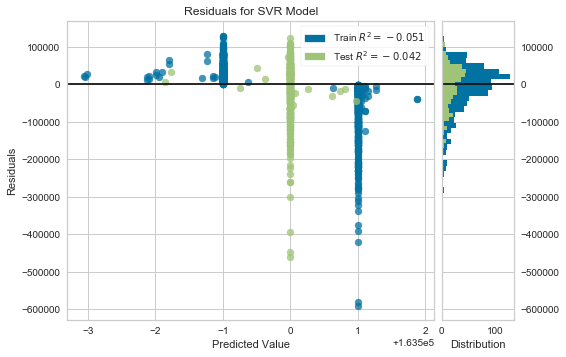

In [147]:

# Instantiate the linear model and visualizer

visualizer = ResidualsPlot(svm)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

__Our Friend Random Forest__

In [148]:
# Random Forest - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=None, n_jobs=-1, random_state=2)
rfScore = get_score(rf)
rfScore

R^2                     0.886764883504274071
RMSE                25554.119207004729105392
MAE                 16841.994863013696885901
TrainingTime(sec)       1.695427179336547852
dtype: float64

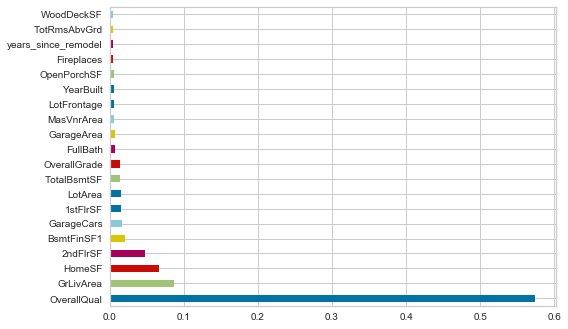

In [149]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances.nlargest(20).plot(kind='barh')

ResidualsPlot(alpha=0.75,
       ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002DBA340A438>,
       hist=True, line_color=None, model=None, test_color=None,
       train_color=None)

0.8867648835042741

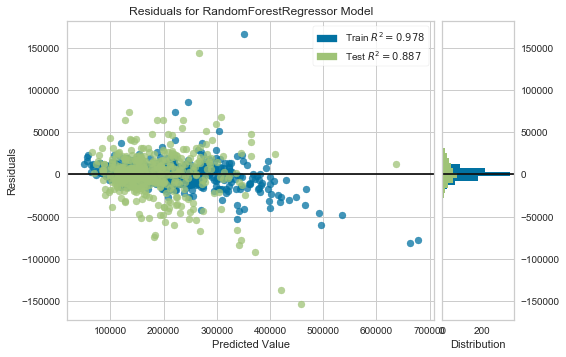

In [150]:
# Instantiate the linear model and visualizer

visualizer = ResidualsPlot(rf)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

__Lets do a gridsearch for max features__

In [152]:
import numpy.random as nr
from sklearn.model_selection import cross_val_score
import sklearn.model_selection as model_selection
# this defines the inner cross-validation
nr.seed(123)
inside = model_selection.KFold(n_splits=10, shuffle = True)

#this defines outer cross-validation
nr.seed(321)
outside = model_selection.KFold(n_splits=10, shuffle = True)


## Define the dictionary for the grid search and the model object to search on
param_grid = {"max_features": list(range(1, 287, 12)), "min_samples_leaf":list(range(1, 20, 2))}

## Perform the grid search over the parameters
nr.seed(4455)
tuned_rf = model_selection.RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'r2',
                      return_train_score = True)

tuned_rf.fit(features, label)
print(tuned_rf.best_estimator_.max_features)
print(tuned_rf.best_estimator_.min_samples_leaf)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
          error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=2, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_features': [1, 13, 25, 37, 49, 61, 73, 85, 97, 109, 121, 133, 145, 157, 169, 181, 193, 205, 217, 229, 241, 253, 265, 277], 'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='r2', verbose=0)

169
1


In [153]:
nr.seed(498)
cv_estimate = model_selection.cross_val_score(tuned_rf, features, label, 
                                 cv = outside) # Use the outside folds

print('Mean R^2 = %4.3f' % np.mean(cv_estimate))
print('SDT of R^2       = %4.3f' % np.std(cv_estimate))
print('R^2 by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean R^2 = 0.870
SDT of R^2       = 0.048
R^2 by cv fold
Fold  1    0.906
Fold  2    0.870
Fold  3    0.844
Fold  4    0.917
Fold  5    0.809
Fold  6    0.912
Fold  7    0.888
Fold  8    0.903
Fold  9    0.889
Fold 10    0.764


In [155]:
#create final cross validation fold for best parameters
#this defines outer cross-validation
nr.seed(45678)
final = model_selection.KFold(n_splits=10, shuffle = True)

nr.seed(1115)
rf_best_params = RandomForestRegressor( 
                                max_features = tuned_rf.best_estimator_.max_features, 
                                min_samples_leaf = tuned_rf.best_estimator_.min_samples_leaf) 
rf_best_params.fit(features, label)

final_cv_estimate = model_selection.cross_val_score(rf_best_params, features, label, 
                                 cv = final) # Use the final folds

print('Mean R^2 = %4.3f' % np.mean(final_cv_estimate))
print('SDT of R^2       = %4.3f' % np.std(final_cv_estimate))
print('R^2 by cv fold')
for i, x in enumerate(final_cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=169, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Mean R^2 = 0.858
SDT of R^2       = 0.038
R^2 by cv fold
Fold  1    0.893
Fold  2    0.868
Fold  3    0.868
Fold  4    0.851
Fold  5    0.869
Fold  6    0.830
Fold  7    0.920
Fold  8    0.839
Fold  9    0.771
Fold 10    0.870


__Gradient Boosting__

In [156]:
# Gradient Boosted Trees - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.1, max_depth=3, random_state=1)
gbtScore = get_score(gbt)
gbtScore

R^2                     0.928708563323229597
RMSE                20276.315216694794798968
MAE                 13922.041264662015237263
TrainingTime(sec)      13.407165765762329102
dtype: float64

ResidualsPlot(alpha=0.75,
       ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002DBA7039518>,
       hist=True, line_color=None, model=None, test_color=None,
       train_color=None)

0.9287085633232296

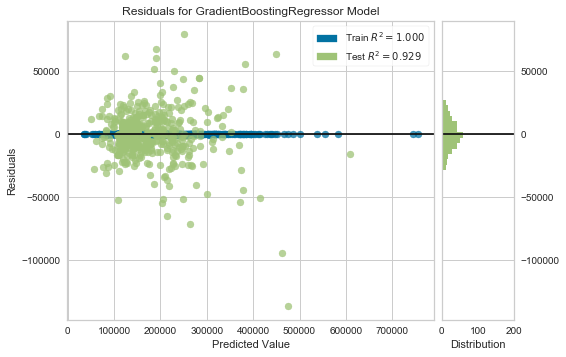

In [157]:

# Instantiate the linear model and visualizer

visualizer = ResidualsPlot(gbt)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

__Elastic Net Regressor__

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import RobustScaler
ENet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
ENScore = get_score(ENet)
ENScore

__XGBoost__

In [ ]:
# from xgboost import XGBClassifier
# xg = XGBClassifier(n_estimators=100)
# xgScore = get_score(xg)
# xgScore

__Lasso Regression__

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lassoScore = get_score(lasso)
lassoScore

# OK, So...this LGBMR improved our score a lot

In [ ]:
import lightgbm as lgb

In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [ ]:
mlgbScore = get_score(model_lgb)
mlgbScore

__Notice here that the lgb and model_lgb models are different in their accuracy, the difference in these models (one of) lies in the number of trees, the lgb model has a lot more trees and scores worse__

# Predict New Data for Submission

In [ ]:
features.shape
test.shape

__Dropping the trainflag and testflag from our test data__

In [ ]:
test = test.drop(['trainflag', 'testflag'], axis=1)

In [ ]:
features.shape
test.shape

In [ ]:
test.drop('SF_price', axis=1, inplace=True)

In [ ]:
gbt.predict(test)

# Stacking predictions and taking the average
- Here we are using Random Forest, Gradient Boosting, LGBM Regressor, and Elastic Net Regressor to predict our test set, we will then take these predictions and average them to see if we can get a better score than using only one model

In [ ]:
stacked_pred = (rf_best_params.predict(X_test) + gbt.predict(X_test) + model_lgb.predict(X_test) + 
                ENet.predict(X_test) + model_lgb.predict(X_test)) / 5

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(y_test, stacked_pred)
np.sqrt(mean_squared_error(y_test, stacked_pred))

__We can stack multiple of the same models here as well__

In [ ]:
## Getting our SalePrice estimation
Final_labels = (rf.predict(test) + gbt.predict(test) + model_lgb.predict(test) + ENet.predict(test) + 
                model_lgb.predict(test)) / 5

In [ ]:
pd.DataFrame(Final_labels).to_csv('x48.csv')

__Stacking or 'ensembling' these increased our score greatly__ 